# Build a Neural Network with Tensorflow Keras on AirBNB prices in Berlin, Germany

This is a cleaned dataset that I worked with in Unit 3 of Lambda School.  The unit project was to use a neural network that would be pickled into an API for a web team to utilize in a web app.  Here's my version of the project:

In [1]:
# Import tesorflow
import tensorflow as tf

In [2]:
# Imports
import pandas as pd

In [3]:
# Read in data with shape and head
df = pd.read_csv('data/airbnb data cleaned.csv')
print(df.shape)
df.head()

(22355, 30)


,Unnamed: 0,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,...,washer,dryer,heating,free_parking,smoking_allowed,property_type,neighbourhood,room_type,cancellation_policy,bed_type
0,0,3,1.0,1,60.0,30.0,200.0,28.0,1,1.624906,...,True,True,True,False,False,0,1,1,0,0
1,1,2,1.0,1,17.0,0.0,0.0,0.0,1,3.170627,...,True,True,True,False,False,1,2,0,1,0
2,2,4,1.0,1,90.0,50.0,200.0,20.0,2,1.872072,...,True,True,True,False,False,1,2,1,0,0
3,3,2,1.0,1,26.0,30.0,250.0,18.0,1,4.456289,...,True,True,True,False,False,1,5,0,0,1
4,4,2,1.0,1,42.0,0.0,0.0,24.0,1,2.663910,...,False,True,True,False,False,1,2,0,2,0


In [48]:
df = df.drop(['Unnamed: 0'], axis=1)

# Get a feel for the data:

In [49]:
# Mean price of the rentals is $57 per night
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,22355.0,2.625990,1.472085,1.000000,2.000000,2.000000,3.000000,16.000000
bathrooms,22355.0,1.090494,0.322568,0.000000,1.000000,1.000000,1.000000,8.500000
bedrooms,22355.0,1.156207,0.629297,0.000000,1.000000,1.000000,1.000000,9.000000
price,22355.0,57.588593,42.208423,1.000000,30.000000,45.000000,70.000000,400.000000
cleaning_fee,22355.0,18.135003,24.699850,0.000000,0.000000,10.000000,30.000000,450.000000
security_deposit,22355.0,117.281637,299.544502,0.000000,0.000000,0.000000,150.000000,4280.000000
extra_people,22355.0,8.257213,11.102157,0.000000,0.000000,5.000000,15.000000,250.000000
guests_included,22355.0,1.327578,0.816318,1.000000,1.000000,1.000000,1.000000,16.000000
distance,22355.0,4.567447,2.749051,0.058689,3.000537,4.093903,5.409587,25.674235
size,22355.0,60.129967,80.774823,0.000000,25.000000,49.157070,65.000000,980.000000


In [50]:
# Have a look at the corr table
df.corr()

,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,washer,dryer,heating,free_parking,smoking_allowed,property_type,neighbourhood,room_type,cancellation_policy,bed_type
accommodates,1.000000,0.234544,0.624824,0.575020,0.357283,0.116358,0.241774,0.509775,0.030099,0.171974,...,0.003961,0.136100,0.069522,0.060302,-0.103244,0.108520,0.021718,0.404217,-0.085482,-0.076280
bathrooms,0.234544,1.000000,0.295856,0.244749,0.131884,0.047230,0.055190,0.164845,0.019898,0.101599,...,0.022373,0.051604,0.021716,0.060060,-0.014770,0.105256,0.006206,-0.001270,-0.036212,-0.026719
bedrooms,0.624824,0.295856,1.000000,0.472923,0.277737,0.112933,0.135594,0.378642,0.039821,0.134289,...,0.063366,0.090672,0.038123,0.061690,-0.089377,0.046668,0.031682,0.220026,-0.060149,-0.052515
price,0.575020,0.244749,0.472923,1.000000,0.404507,0.179877,0.190459,0.415673,-0.102916,0.226746,...,-0.003351,0.152889,0.051452,0.035868,-0.150714,0.114503,-0.058576,0.402571,-0.096504,-0.060994
cleaning_fee,0.357283,0.131884,0.277737,0.404507,1.000000,0.423176,0.254963,0.296281,-0.038945,0.147903,...,0.052490,0.158456,0.083206,0.029833,-0.154561,0.019450,-0.008300,0.328537,-0.141267,-0.036636
security_deposit,0.116358,0.047230,0.112933,0.179877,0.423176,1.000000,0.118563,0.098750,-0.025754,0.074717,...,0.064551,0.048725,0.033422,0.015638,-0.090746,0.007302,0.004880,0.181955,-0.102393,-0.008360
extra_people,0.241774,0.055190,0.135594,0.190459,0.254963,0.118563,1.000000,0.327029,-0.013768,0.116484,...,0.002164,0.121283,0.055484,0.017641,-0.045392,0.051903,-0.004464,0.086490,-0.054781,-0.009351
guests_included,0.509775,0.164845,0.378642,0.415673,0.296281,0.098750,0.327029,1.000000,-0.004848,0.123696,...,0.001941,0.093506,0.056893,0.033343,-0.080997,0.037828,-0.004419,0.234995,-0.052508,-0.036101
distance,0.030099,0.019898,0.039821,-0.102916,-0.038945,-0.025754,-0.013768,-0.004848,1.000000,-0.018806,...,-0.049581,-0.002683,0.008342,0.229212,-0.011832,0.145907,0.717466,-0.013262,0.019110,0.010778
size,0.171974,0.101599,0.134289,0.226746,0.147903,0.074717,0.116484,0.123696,-0.018806,1.000000,...,-0.013251,0.053270,0.022828,0.031496,-0.050629,0.041443,-0.010764,0.114623,-0.046046,-0.025513


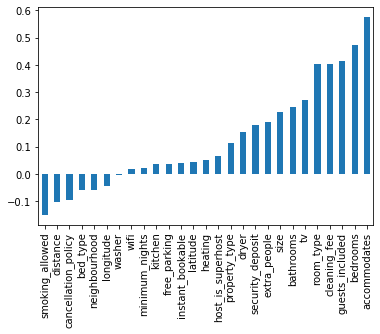

In [51]:
# Visualize correlation of features to price
df.corr()['price'].sort_values()[:-2].plot(kind='bar')

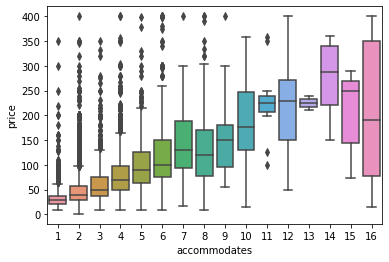

In [52]:
# Distributions between 'price' and 'accommodates'
sns.boxplot(x='accommodates',y='price',data=df)

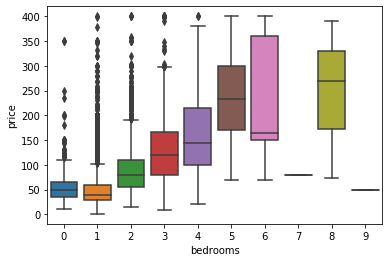

In [53]:
# Distributions between 'price' and 'bedrooms'
sns.boxplot(x='bedrooms',y='price',data=df)

# Construct the model:

In [73]:
# Train test split:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17884, 28)
(17884,)
(4471, 28)
(4471,)


In [74]:
# Scale data:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
sc = MinMaxScaler()

# Fit scaler on X_train to apply transformation on X sets
sc.fit(X_train)

# Transform both X
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Viz of X_train[0] as scaled
print(X_train[0])

[0.06666667 0.11764706 0.         0.06666667 0.07092199 0.
 0.         0.03241642 0.03571429 0.         0.59289431 0.45878808
 0.00580116 1.         0.         0.         1.         1.
 1.         1.         1.         0.         0.         0.25
 0.09090909 0.5        0.         0.        ]


In [75]:
X_train.shape

(17884, 28)

In [76]:
X_test.shape

(4471, 28)

In [77]:
# Create the Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras import metrics


# Create model object
model = Sequential()

# Input, hidden, output layers
model.add(Dense(128, activation='relu', input_shape=(28,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mae])

In [78]:
# Fit model with validation data to test for overfitting
model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)



Train on 17884 samples, validate on 4471 samples
Epoch 1/400
17884/17884 [==============================] - 1s 65us/sample - loss: 35.0920 - mean_absolute_error: 35.0920 - val_loss: 22.4138 - val_mean_absolute_error: 22.4138
Epoch 2/400
17884/17884 [==============================] - 1s 31us/sample - loss: 22.5816 - mean_absolute_error: 22.5816 - val_loss: 19.3218 - val_mean_absolute_error: 19.3218
Epoch 3/400
17884/17884 [==============================] - 1s 30us/sample - loss: 20.8706 - mean_absolute_error: 20.8706 - val_loss: 18.7210 - val_mean_absolute_error: 18.7210
Epoch 4/400
17884/17884 [==============================] - 1s 30us/sample - loss: 20.4810 - mean_absolute_error: 20.4810 - val_loss: 18.6344 - val_mean_absolute_error: 18.6344
Epoch 5/400
17884/17884 [==============================] - 1s 30us/sample - loss: 20.2841 - mean_absolute_error: 20.2841 - val_loss: 18.9863 - val_mean_absolute_error: 18.9863
Epoch 6/400
17884/17884 [==============================] - 1s 30us/samp

17884/17884 [==============================] - 1s 29us/sample - loss: 18.0399 - mean_absolute_error: 18.0399 - val_loss: 17.1172 - val_mean_absolute_error: 17.1172
Epoch 48/400
17884/17884 [==============================] - 1s 32us/sample - loss: 17.9961 - mean_absolute_error: 17.9961 - val_loss: 17.1127 - val_mean_absolute_error: 17.1127
Epoch 49/400
17884/17884 [==============================] - 1s 31us/sample - loss: 18.1864 - mean_absolute_error: 18.1864 - val_loss: 17.3033 - val_mean_absolute_error: 17.3033
Epoch 50/400
17884/17884 [==============================] - 1s 31us/sample - loss: 18.0976 - mean_absolute_error: 18.0976 - val_loss: 17.1094 - val_mean_absolute_error: 17.1094
Epoch 51/400
17884/17884 [==============================] - 1s 31us/sample - loss: 18.1665 - mean_absolute_error: 18.1665 - val_loss: 17.1175 - val_mean_absolute_error: 17.1175
Epoch 52/400
17884/17884 [==============================] - 1s 31us/sample - loss: 17.8460 - mean_absolute_error: 17.8460 - val_

17884/17884 [==============================] - 1s 30us/sample - loss: 16.1278 - mean_absolute_error: 16.1278 - val_loss: 16.0762 - val_mean_absolute_error: 16.0762
Epoch 140/400
17884/17884 [==============================] - 1s 31us/sample - loss: 16.1748 - mean_absolute_error: 16.1748 - val_loss: 16.1178 - val_mean_absolute_error: 16.1178
Epoch 141/400
17884/17884 [==============================] - 1s 32us/sample - loss: 16.2975 - mean_absolute_error: 16.2975 - val_loss: 15.8816 - val_mean_absolute_error: 15.8816
Epoch 142/400
17884/17884 [==============================] - 1s 32us/sample - loss: 16.2702 - mean_absolute_error: 16.2702 - val_loss: 16.1207 - val_mean_absolute_error: 16.1207
Epoch 143/400
17884/17884 [==============================] - 1s 30us/sample - loss: 16.1842 - mean_absolute_error: 16.1842 - val_loss: 15.7005 - val_mean_absolute_error: 15.7005
Epoch 144/400
17884/17884 [==============================] - 1s 31us/sample - loss: 16.2120 - mean_absolute_error: 16.2120 -

17884/17884 [==============================] - 1s 30us/sample - loss: 15.2873 - mean_absolute_error: 15.2873 - val_loss: 15.0248 - val_mean_absolute_error: 15.0248
Epoch 232/400
17884/17884 [==============================] - 1s 30us/sample - loss: 15.1837 - mean_absolute_error: 15.1837 - val_loss: 15.2031 - val_mean_absolute_error: 15.2031
Epoch 233/400
17884/17884 [==============================] - 1s 30us/sample - loss: 15.2427 - mean_absolute_error: 15.2427 - val_loss: 14.6422 - val_mean_absolute_error: 14.6422
Epoch 234/400
17884/17884 [==============================] - 1s 32us/sample - loss: 15.1461 - mean_absolute_error: 15.1461 - val_loss: 15.2132 - val_mean_absolute_error: 15.2132
Epoch 235/400
17884/17884 [==============================] - 1s 30us/sample - loss: 15.1202 - mean_absolute_error: 15.1202 - val_loss: 14.7382 - val_mean_absolute_error: 14.7381
Epoch 236/400
17884/17884 [==============================] - 1s 31us/sample - loss: 15.3300 - mean_absolute_error: 15.3300 -

17884/17884 [==============================] - 1s 30us/sample - loss: 14.6500 - mean_absolute_error: 14.6500 - val_loss: 14.0748 - val_mean_absolute_error: 14.0748
Epoch 324/400
17884/17884 [==============================] - 1s 30us/sample - loss: 14.6024 - mean_absolute_error: 14.6024 - val_loss: 14.2594 - val_mean_absolute_error: 14.2594
Epoch 325/400
17884/17884 [==============================] - 1s 30us/sample - loss: 14.5473 - mean_absolute_error: 14.5473 - val_loss: 14.2479 - val_mean_absolute_error: 14.2479
Epoch 326/400
17884/17884 [==============================] - 1s 30us/sample - loss: 14.6162 - mean_absolute_error: 14.6162 - val_loss: 14.7737 - val_mean_absolute_error: 14.7737
Epoch 327/400
17884/17884 [==============================] - 1s 30us/sample - loss: 14.4411 - mean_absolute_error: 14.4411 - val_loss: 14.6258 - val_mean_absolute_error: 14.6258
Epoch 328/400
17884/17884 [==============================] - 1s 30us/sample - loss: 14.4865 - mean_absolute_error: 14.4865 -

# Model Evaluations:

In [79]:
#Here's the baseline accuracy for the model:
scores = model.evaluate(X_train, y_train)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

17884/17884 [==============================] - 1s 35us/sample - loss: 11.3452 - mean_absolute_error: 11.3452
mean_absolute_error: 1134.519863128662


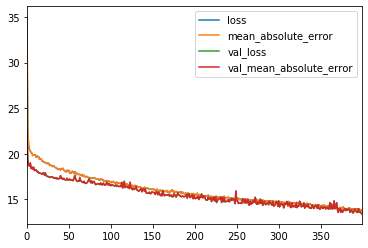

In [80]:
# Plot the model's loss to see if model is overfitting
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [81]:
# See predictions
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

13.383893142048343

In [82]:
# Random test:
index = 90

X_pred = sc.transform([df.drop('price', axis=1).iloc[index]])
y_real = df.iloc[index]['price']
y_pred = model.predict([X_pred])

print(f'Prediction: ${y_pred[0][0]} | Real: ${y_real}')

Prediction: $57.080543518066406 | Real: $55.0
